## Imports

In [28]:
from functools import partial
import numpy as np
from numpy.random import normal
from scipy.stats import norm
import matplotlib.pyplot as plt
from seaborn import kdeplot as kde

`numpy.random.normal(loc=0.0, scale=1.0, size=None)¶`

## Create datasets

In [256]:
true_density = partial(normal, loc=5.0, scale=2.0)

In [291]:
gen_5 = true_density(size=5)
gen_20 = true_density(size=20)
gen_50 = true_density(size=50)

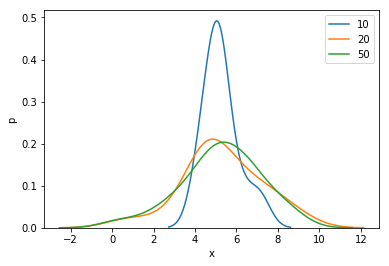

In [258]:
kde(gen_10, label='10'); kde(gen_20, label='20'); kde(gen_50, label='50')
plt.xlabel('x'); plt.ylabel('p')
plt.show()

## Parameter estimation for mean

Function interfaces:
- prior function: 
    - output: the density of particular parameter values
- likelihood function: 
    - input: parameter value(s), data point(s)
    - output: likelihood
- posterior function:
    - algorithm:
        - for each parameter value -- likelihood function:
             - compute all densities over data (in a single shot)
             - multiply the densities all together
        - unnormalized_posteriors = prior(parameter values) (odot) likelihood(X, parameter values)
        - p_X = np.sum(unnormalized_posteriors)
        - normalized_posteriors = unnormalized_posteriors / p_X

In [335]:
prior_over_mu = norm(loc=10, scale=1)
prior_flat = norm(loc=0, scale=10)

In [267]:
stepsize = 0.1
mus = np.arange(0, 15, stepsize)
prior_densities_mu = prior_over_mu.pdf(mus)  # prior function

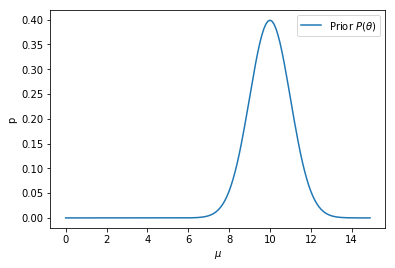

In [268]:
plt.plot(mus, prior_densities_mu, label=r'Prior $P(\theta)$')
plt.xlabel(r'$\mu$'); plt.ylabel('p')
plt.legend(); plt.show()

In [321]:
def likelihood(data, param_values):
    likelihoods = []
    for v in param_values:
        model = norm(loc=v, scale=2.0)
        probas = model.pdf(data)
        likelihood = np.prod(probas)
        likelihoods.append(likelihood)
    likelihoods = np.array(likelihoods)
    return likelihoods / np.sum(likelihoods * 0.1)  # numerical intergration

In [278]:
def posterior(prior, param_values, data):
    unnormalized_posteriors = prior.pdf(param_values) * likelihood(data, param_values)
    p_X = np.sum(unnormalized_posteriors * stepsize)  # numerical integration
    normalized_posteriors = unnormalized_posteriors / p_X
    return normalized_posteriors

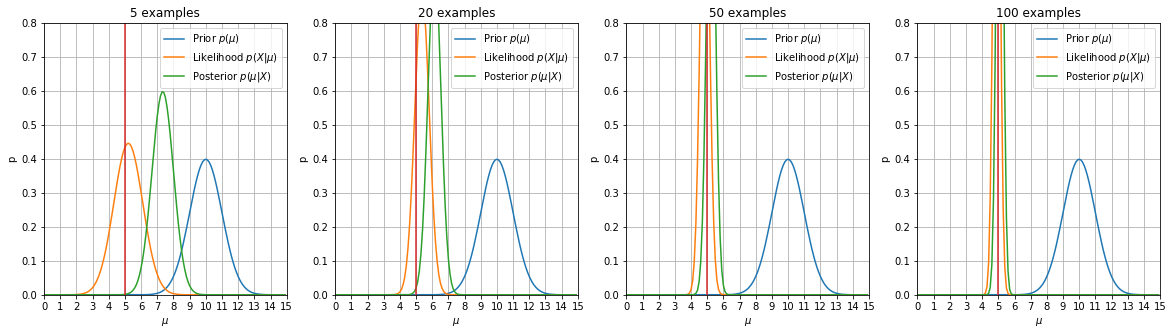

In [337]:
fig = plt.figure(figsize=(20, 5))

nums_examples = [5, 20, 50, 100]
for i, num in enumerate(nums_examples):
    
    ax = fig.add_subplot(1, len(nums_examples), i+1)
    
    gen = true_density(size=num)
    likelihoods = likelihood(gen, mus)
    posteriors = posterior(prior_over_mu, mus, gen)
    
    ax.plot(mus, prior_densities_mu/np.sum(prior_densities_mu*stepsize), label=r'Prior $p(\mu)$')
    ax.plot(mus, likelihoods, label=r'Likelihood $p(X|\mu)$')
    ax.plot(mus, posteriors, label=r'Posterior $p(\mu|X)$')
    ax.plot([5, 5], [0, 1])
    
    ax.set_title(f'{num} examples')
    ax.set_xlabel(r'$\mu$'); ax.set_ylabel('p')
    ax.set_xlim(0, 15); ax.set_ylim(0, 0.8); ax.set_xticks(np.arange(0, 16, 1))
    ax.legend(loc='upper right'); ax.grid()

plt.show()

## Estimate multiple parameters 